# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- [Question 1](#toc1_)    
- [Question 2](#toc2_)    
- [Question 3](#toc3_)    
- [Question 4](#toc4_)    
- [Conclusion](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports and set magics:

In [9]:
import numpy as np
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import packages for plots etc. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import ipywidgets as widgets # For interactive plots/buttons

# Import your own code
import inauguralproject 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a id='toc1_'></a>[Question 1](#toc0_)

The model is specified in the class "HouseholdSpecializationModelClass", which contains all model equations and methods used for solving the different questions in the assignment. 

We create an instance of the class:

In [10]:
model = inauguralproject.HouseholdSpecializationModelClass()

In order to illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we solve the model discretely for different combinations of the parameters $\alpha$ and $\sigma$ and assign the outputs to a matrix presenting the results.

**Procedure**
1. We construct lists of the required parameter values of $\alpha$ and $\sigma$

2. We construct a nested loop that solves the model discretely for each combination of $\alpha$ and $\sigma$ and returns the ratio $\frac{H_F}{H_M}$

3. We assign the solutions to a dataframe displaying the ratio betweeen $H_F$ and $H_M$ for all relevant values of $\sigma$ and $\alpha$

In [11]:
# Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

# Construct table
df = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))

# Solve model for different parameter values and add results to table
for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Print table
print(df)



c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


From this matrix we observe that as $\alpha$ increases for a fixed $\sigma$, then $\frac{H_F}{H_M}$ increases as well. The interpretation is that when $\alpha$ increases females become more productive in home production relative to males, thus a higher $\alpha$ implies that the $\frac{H_F}{H_M}$ is higher in the household's optimal allocation. Moreover, we see that when $\alpha >0.5$ women are more productive in home production than men, which for any value of $\sigma$ implies a ratio above 1, meaning that the female member of the household provides relatively more hours working at home. On the other hand, if $\alpha < 0.5$ men are more productive in home production than women implying that men provides more hours working at home than women, i.e., the ratio is below 1 for any given $\sigma$. Finally when men and women are equally productive in home production, i.e. $\alpha = 0.5$, they provide an equal amount of hours working at home.

Considering the elasticity of substitution, $\sigma$, we observe that when $\alpha = 0.5$, i.e, when men and women are equally productive, varying $\sigma$ does not affect the ratio. However, when women are more productive than men in home production, then a higher $\sigma$ will imply a lower ratio, and similarly when men are more productive in home production than women a higher $\sigma$ implies a higher ratio. The interpretation is that when the elasticity of substitution is higher, then a marginal change in the productivity of women relative to men will have a larger effect on the optimal ratio. Thus, a marginal decrease in $\alpha$ results in a larger drop in the ratio, and a marignal increase in $\alpha$ implies a larger increase in the ratio.

## <a id='toc2_'></a>[Question 2](#toc0_)

In this section, we will plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in [0.8,0.9,1.0,1.1,1.2]$. As we evaluate $\log \frac{w_F}{w_M}$ for a fixed $w_M=1.0$, we can plot $\log \frac{H_F}{H_M}$ against $\log w_F$.

**Procedure**
1. We start by resetting $\alpha$ and $\sigma$ to its baseline values.
2. Next, we use the solve_wF_vec (discrete=True) method to solve the optimization problem discretely for different values of $w_F$. This method loops through the different values of $w_F$ and solves the model for each of these values.
3. Next, we define the $\log \frac{H_F}{H_M}$-vector and assign the solutions to this variable.
4. Finally, we plot the solutions for $\log \frac{H_F}{H_M}$ against the different values of $\log w_F$ by using matplotlib.pyplot.

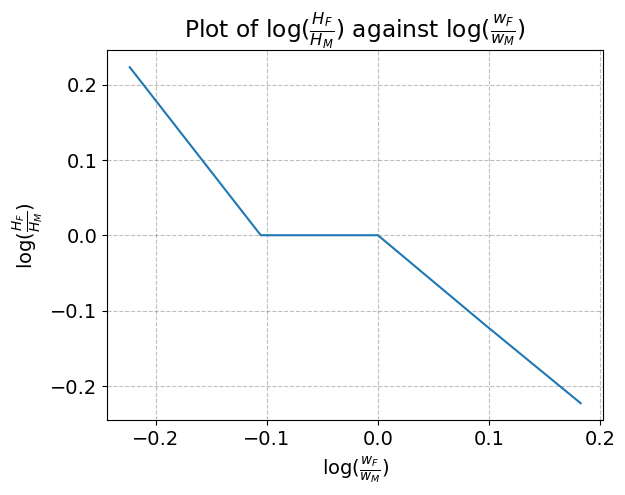

In [12]:
# reset alpha and sigma to baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Create empty lists of log-ratios
logHF_HM = np.zeros(5)
logwF_wM = np.zeros(5)

#solve model discretely
model.solve_wF_vec(discrete=True)

# create relevant variables
for i in range(5):
    logHF_HM[i] = np.log(model.sol.HF_vec[i]/ model.sol.HM_vec[i])
    logwF_wM[i] = np.log(model.par.wF_vec[i])

# create the figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(logwF_wM,logHF_HM)

ax.set_title("Plot of " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(r'$\log(\frac{w_F}{w_M})$')
ax.set_ylabel(r'$\log(\frac{H_F}{H_M})$');

plt.show()


The figure shows a negative relationship between $\log\frac{H_F}{H_M}$ and $\log\frac{w_F}{w_M}$. That is as $\log\frac{w_F}{w_M}$ increases, i.e., the wage of the female member increases relative to the male member, then the $log\frac{H_F}{H_M}$ decreases. The intuition is that when the female labor wage increases, the return on female labor increases relative to male members. Therefore, it is optimal for the household to let female members to substitute towards more hours working in the labor market and for male members to provide more hours working in the house.

We observe that when $\log\frac{w_F}{w_M} = 0$, the wage of men and women is equal, and as we have assumed that $\alpha = 0.5$ (i.e. equal productivity in home production for male and female member), then the female member has no comparative advantage in home production compared to men and vice versa, hence they will provide an equal amount of hours working at home (i.e., $\log\frac{H_F}{H_M}=0$). 


## <a id='toc3_'></a>[Question 3](#toc0_)

In this section we are again asked to plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in [0.8,0.9,1.0,1.1,1.2]$. However, now we assume that the choice set is continuous, i.e. $L_M, L_F, H_M, H_F \in [0,24]$.

**Procedure**
1. First, we solve the model continously for the different values of $w_F$ by calling the method solve_wF_vec(discrete=False).
2. Next, we assign the different solutions to the log-ratio vectors. 
3. Finally, we plot the solutions by using matplotlib.pyplot. 

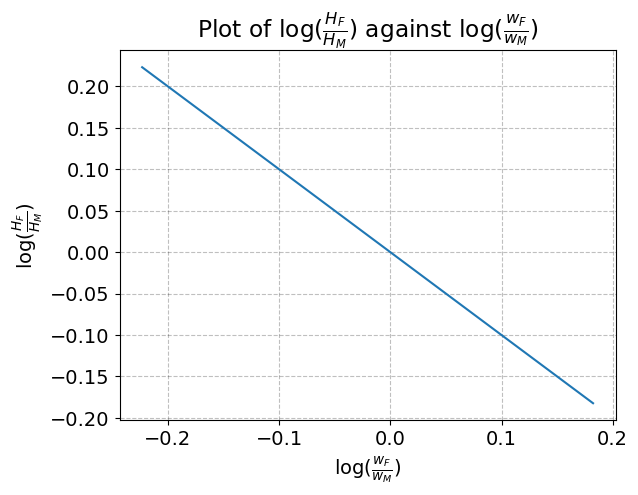

In [13]:
#solve model continously
model.solve_wF_vec(discrete=False)

#create relevant variables
for i in range(5):
    logHF_HM[i] = np.log(model.sol.HF_vec[i]/ model.sol.HM_vec[i])
    logwF_wM[i] = np.log(model.par.wF_vec[i])

# create the figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(logwF_wM,logHF_HM)

ax.set_title("Plot of " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(r'$\log(\frac{w_F}{w_M})$')
ax.set_ylabel(r'$\log(\frac{H_F}{H_M})$');

plt.show()


## <a id='toc4_'></a>[Question 4](#toc0_)
We are asked to estimate the values of $\alpha$ and $\sigma$ that minimizes the function $(\beta_0-\hat{\beta_0})^2+(\beta_1-\hat{\beta_1})^2$. 

**Procedure**
1. Firstly we solves the model either continously for the female wages vector. A numerical optimizer is used to minimize the equation.
2. Secondly we plot the function values for different combinations of $\alpha$ and $\sigma$ by using matplotlib.pyplot.  



In [14]:
from scipy import optimize

def objective_func(par): 
    alpha, sigma = par
    model = inauguralproject.HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_true = 0.4
    beta1_true = -0.1

    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_continous()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    return ((beta0_true - beta0)**2 + (beta1_true - beta1)**2)


par_guess = [0.5,1.0]
bounds = ((0.000001,1.0),(0.0000001,4.0))

result = optimize.minimize(objective_func, par_guess,bounds=bounds, method="nelder-mead")
x = (result.x[0],result.x[1])
print(f'Optimal values are alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')
print(f'The squared deviation from data moments is in this case: {objective_func(x)}')


c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:87: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)
c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1

Optimal values are alpha=0.982 and sigma=0.100
The squared deviation from data moments is in this case: 4.5789381450460494e-10


In [15]:
alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.05,0.1,20)

func_vec = [] 
# Using a nested Loop over alpha and sigma values 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        model = inauguralproject.HouseholdSpecializationModelClass() #Creating an instance
        model.par.alpha = alpha
        model.par.sigma = sigma 
        model.solve_wF_vec() #Calling female wage solver
        model.run_regression() #Calling regression
        func_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if func_value > 0:
            func_vec.append(func_value)

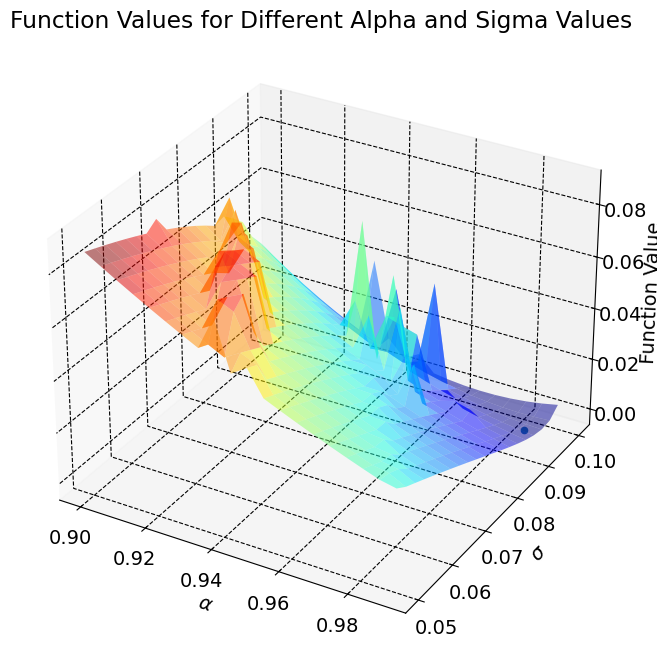

In [16]:
func_vals = np.array(func_vec).reshape(len(alphas), len(sigmas)) #Making length of the alpha and sigma vector the same as func_vec
# Create grid of alpha and sigma values 
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)
# Create 3D plot
fig = plt.figure(figsize=(10,8)) #Initiating figure
ax = plt.axes(projection='3d') #Making the plot 3d
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='jet', alpha = 0.50) #Creating figure
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2]) #Plotting optimal solution
ax.set_xlabel(r'$\alpha$') # X-label
ax.set_ylabel(r'$\sigma$') # Y-label
ax.set_zlabel('Function Value') #Z-label
ax.set_title('Function Values for Different Alpha and Sigma Values') #Title
plt.show() 

As mentioned earlier, when $\alpha=0.5$ then men and women are equally productive at home production. The regression yeilds that the optimal value of $\alpha = 0..998$. That is the value of $\alpha$ that minimizes the squared deviation, is very close to 1. This implies the results from Siminski and Yetsenga (2022) indicates that the woman is more productive in home production than the man. $\sigma=0.091$ meaning, that there is a low degree of substitution between the man and the woman in house production. The parameter estimate from Siminski and Yetsenga (2022), $\beta_1=0.1$, implies that when the relative wage between men and women increase with 1%, then the relative hours worked at home will increase by 0,1%. I.e when women earn relatively more on the labor market the hours they spent working a home will fall, but it will not fall with the same amount as the wage increase. This is due the low degree of substitution between the input factors in home production, men and women. 

ADD CONCISE CONLUSION.

## <a id='toc5_'></a>[Conclusion](#toc0_)